In [1]:
import statsmodels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from matplotlib.pyplot import show
%matplotlib inline
df = pd.read_pickle('ProcessedTJR.pkl')
df_drop = pd.read_pickle('DroppedTJR.pkl')
df.describe()
df.columns

Index(['TKA', 'Opioid_Naiive', 'Used_Last_60_Days', 'Chronic_Opioid_Use',
       'Approx_Last_12hr_FAM', 'Female', 'Pulse', 'Temp', 'Height(m)',
       'Weight(kg)', 'BMI', 'Obesity_Level', 'Age', 'Age_Range',
       'Alcohol_Abuse', 'Tobacco_Use', 'Possible_Substance_Addiction',
       'Depression', 'Anxiety', 'Depression_and_Anxiety',
       'Other_Chronic_Pain_List', 'Other_Chronic_Pain', 'Hyperlipidemia',
       'Blood_Loss_ml', 'Tourniquet_Time_min', 'Tourniquet_Levels',
       'Complications', 'Surgeon', 'Side', 'Marital_Status', 'Children',
       'Occupation', 'Education', 'Race',
       'Previous_Joint_Replacement_or_Scopy', 'Revision',
       'Initial_Perscribed_MME', 'Initial_Perscribed_MME_Level',
       'Level_of_MME_Taken'],
      dtype='object')

In [32]:
import scipy.stats as stats

columns_list =['Opioid_Naiive', 'Chronic_Opioid_Use', 'Approx_Last_12hr_FAM', 'Female',
       'Height(m)', 'BMI', 'Obesity_Level', 'Age', 'Age_Range', 'Tobacco_Use',
       'Possible_Substance_Addiction', 'Depression', 'Anxiety',
       'Depression_and_Anxiety', 'Other_Chronic_Pain_List',
       'Other_Chronic_Pain', 'Hyperlipidemia', 'Tourniquet_Levels', 'Children',
       'Previous_Joint_Replacement_or_Scopy', 'Revision']
#df_drop = df_drop.filter(items=['Chronic_Opioid_Use',  'Previous_Joint_Replacement_or_Scopy','Tourniquet_Levels', 'Obesity_Level', 
           #     'Alcohol_Abuse', 'Depression', 'Other_Chronic_Pain', 'Hyperlipidemia','Age_Range', 'Tourniquet_Levels', 'Obesity_Level', 'Alcohol_Abuse', 'Depression', 'Other_Chronic_Pain'])
                         
for col in columns_list :
    STAT =stats.ttest_1samp(a=df[df['Level_of_MME_Taken']==1][col], popmean = df[col].mean(), nan_policy ='omit')
    if STAT[1] <=0.1  :
        print ("stat for %s:  %s" %(col,stats.ttest_1samp(a=df[df['Level_of_MME_Taken']==1][col], popmean = df[col].mean(), nan_policy ='omit')))
    

stat for Chronic_Opioid_Use:  Ttest_1sampResult(statistic=1.6610893584827309, pvalue=0.09859446542469717)
stat for Age:  Ttest_1sampResult(statistic=-1.8208676140563829, pvalue=0.0704385663324702)
stat for Tourniquet_Levels:  Ttest_1sampResult(statistic=1.7508155786548179, pvalue=0.08183614195809351)


,Chronic_Opioid_Use,Previous_Joint_Replacement_or_Scopy,Tourniquet_Levels,Obesity_Level,Alcohol_Abuse,Depression,Tourniquet_Levels,Obesity_Level,Alcohol_Abuse,Depression
Chronic_Opioid_Use,NaN,0.257490,NaN,NaN,NaN,0.184567,NaN,NaN,NaN,0.184567
Previous_Joint_Replacement_or_Scopy,0.257490,NaN,0.143432,NaN,NaN,NaN,0.143432,NaN,NaN,NaN
Tourniquet_Levels,NaN,0.143432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Obesity_Level,NaN,NaN,NaN,NaN,-0.126903,0.188202,NaN,NaN,-0.126903,0.188202
Alcohol_Abuse,NaN,NaN,NaN,-0.126903,NaN,NaN,NaN,-0.126903,NaN,NaN
Depression,0.184567,NaN,NaN,0.188202,NaN,NaN,NaN,0.188202,NaN,NaN
Tourniquet_Levels,NaN,0.143432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Obesity_Level,NaN,NaN,NaN,NaN,-0.126903,0.188202,NaN,NaN,-0.126903,0.188202
Alcohol_Abuse,NaN,NaN,NaN,-0.126903,NaN,NaN,NaN,-0.126903,NaN,NaN
Depression,0.184567,NaN,NaN,0.188202,NaN,NaN,NaN,0.188202,NaN,NaN


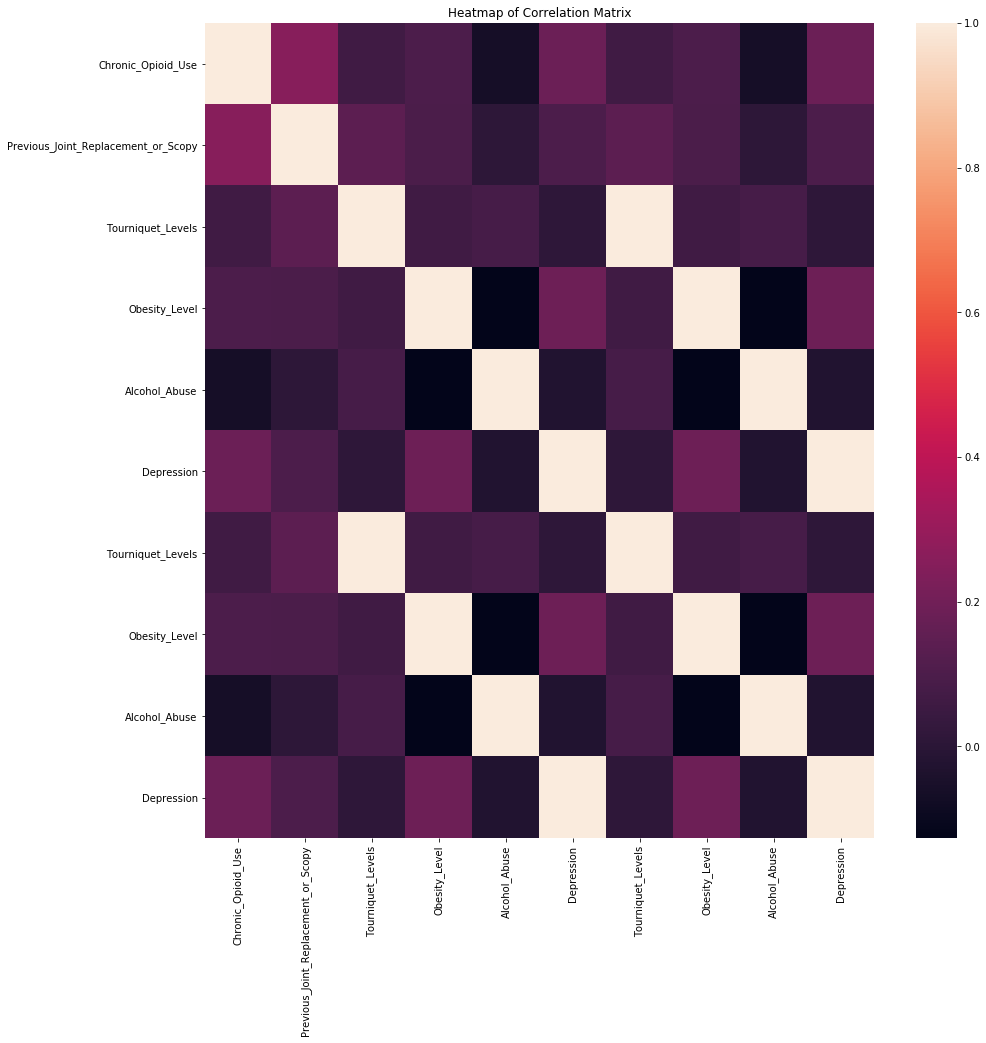

In [39]:
corr = df_drop.corr()
corr = (corr)
plt.figure(figsize=(15,15),)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr
corr[((abs(corr)> .1) & (abs(corr)< 1))]

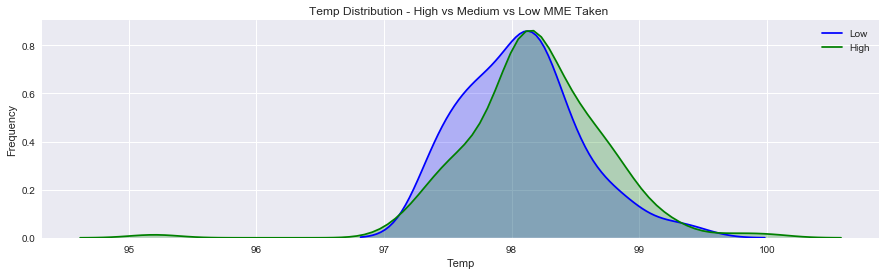

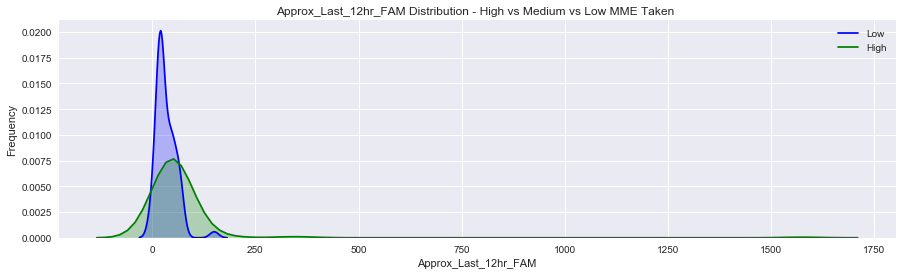

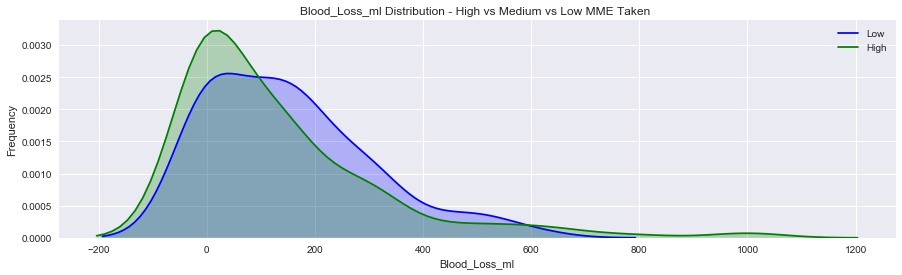

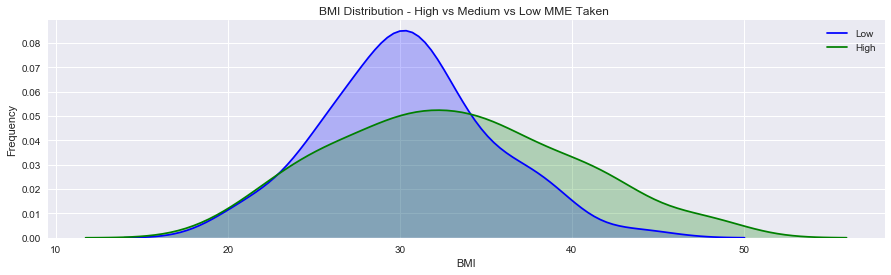

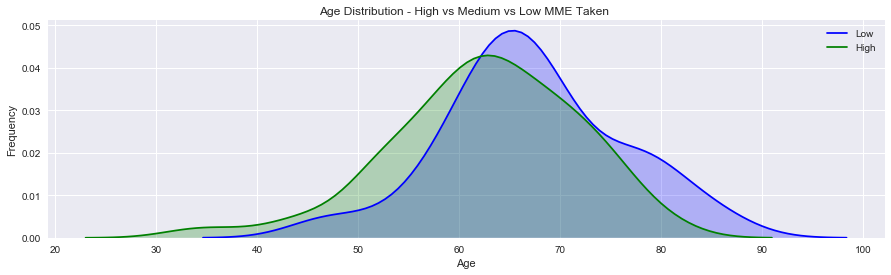

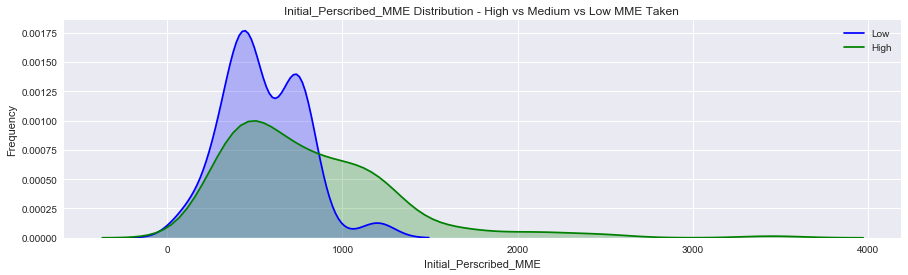

In [20]:
cont_cols = ['Temp', 'Approx_Last_12hr_FAM','Blood_Loss_ml', 'BMI','Age','Initial_Perscribed_MME'] #pULSE 'Tourniquet_Time_min', 
# Kernel Density Plot
for col in cont_cols : 
    fig = plt.figure(figsize=(15,4),)
    ax=sns.kdeplot(df.loc[(df['Level_of_MME_Taken'] == 0),col] , color='b',shade=True,label='Low')
    #ax=sns.kdeplot(df.loc[(df['Level_of_MME_Taken'] == 1),col] , color='r',shade=True, label='Medium')
    ax=sns.kdeplot(df.loc[(df['Level_of_MME_Taken'] == 1),col] , color='g',shade=True, label='High')
    ax.set(xlabel=col, ylabel='Frequency')
    plt.title(col + ' Distribution - High vs Medium vs Low MME Taken ')

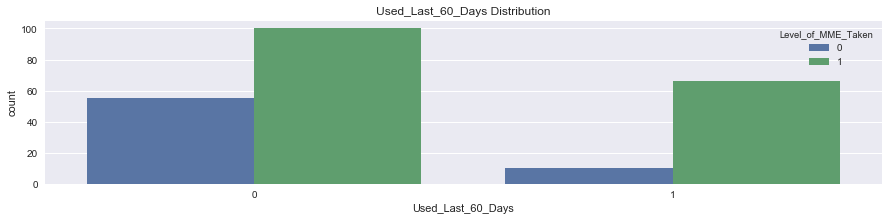

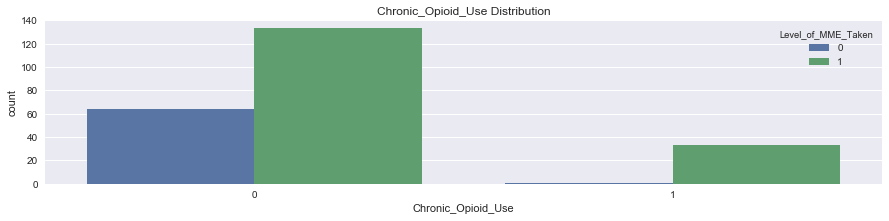

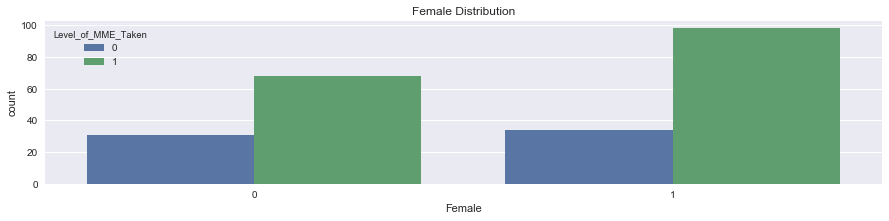

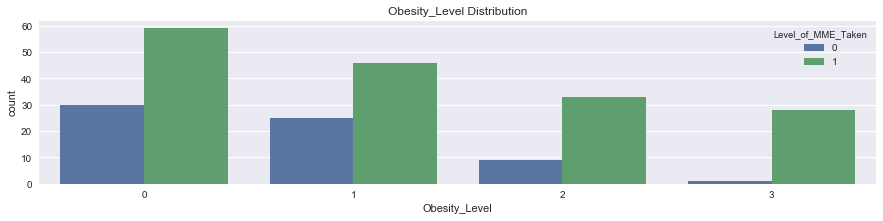

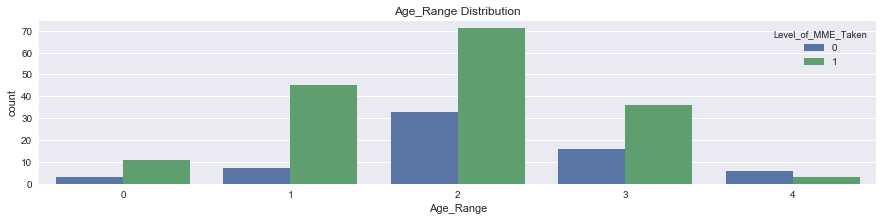

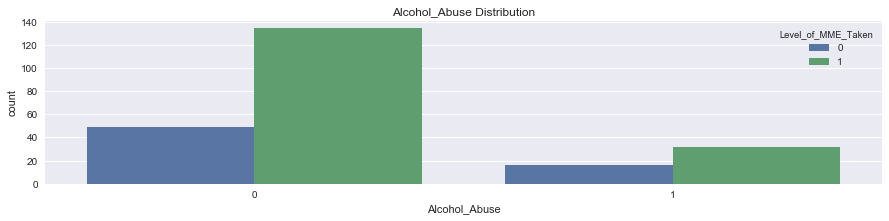

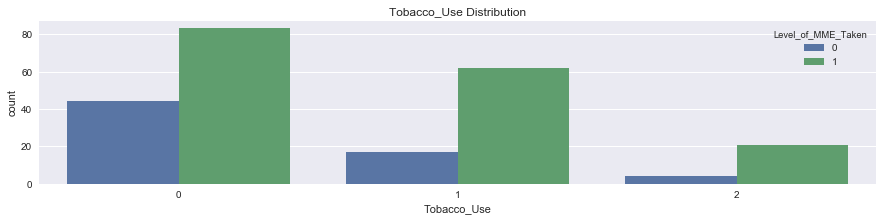

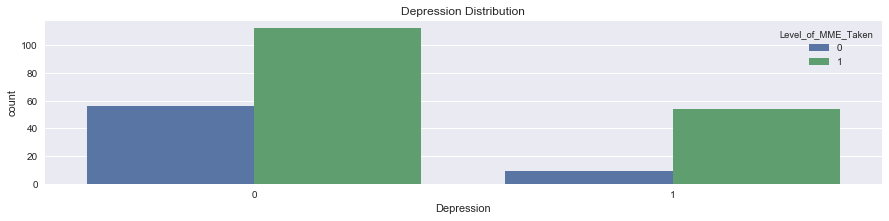

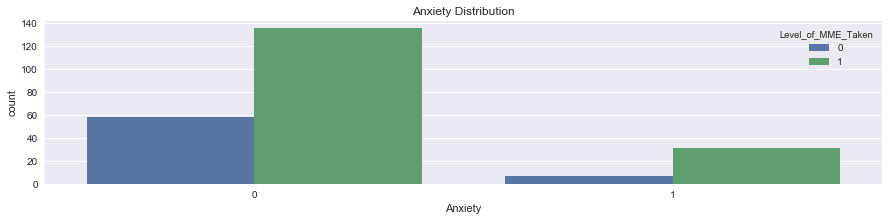

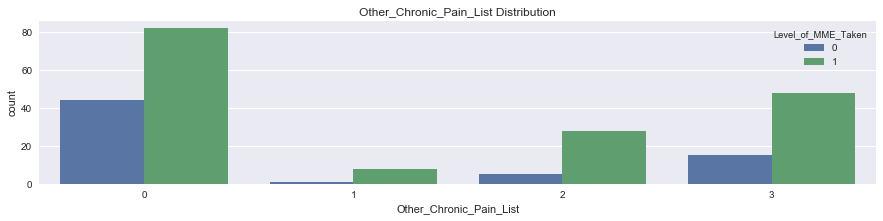

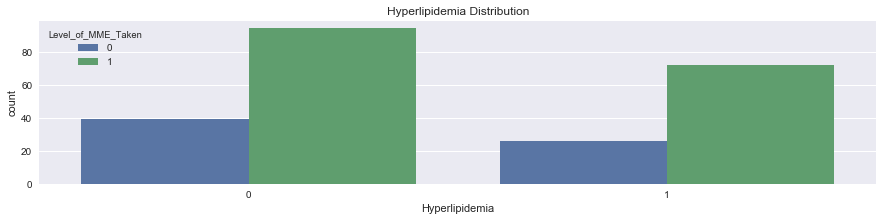

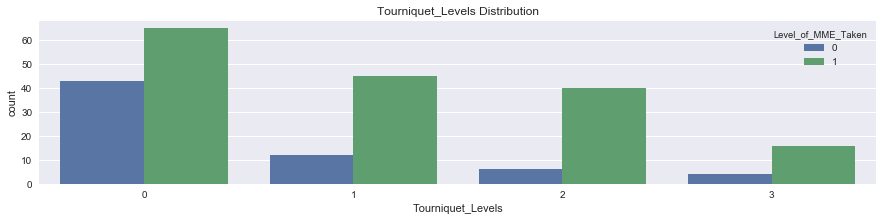

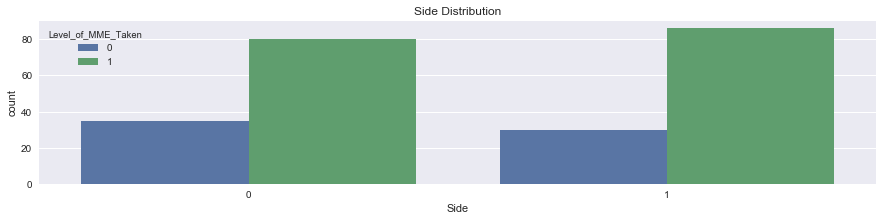

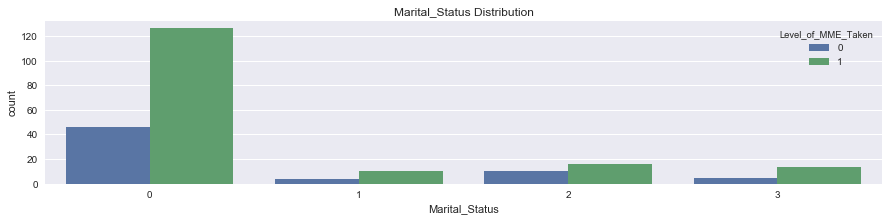

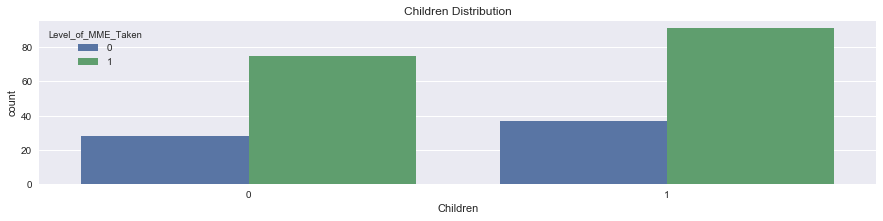

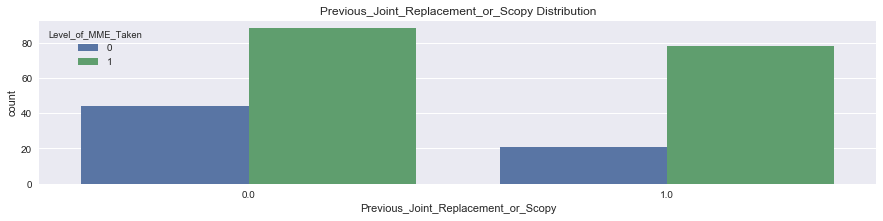

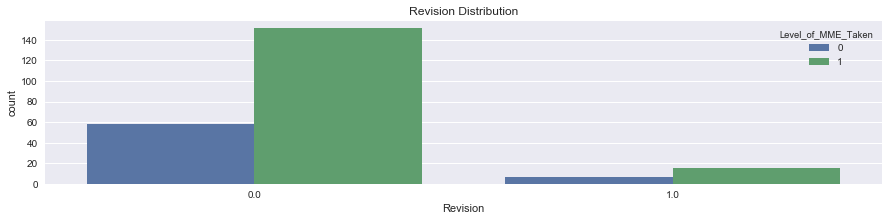

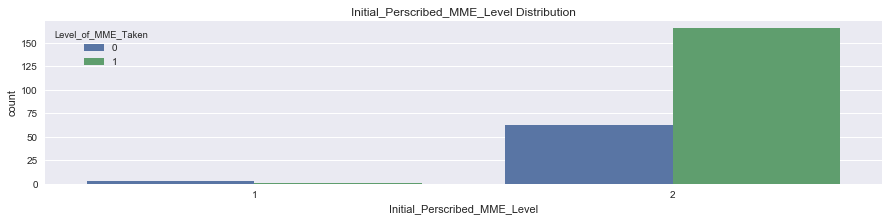

In [21]:
disc_cols=['Opioid_Naiive', 'Used_Last_60_Days', 'Chronic_Opioid_Use',
        'Female','Obesity_Level',
       'Age_Range', 'Alcohol_Abuse', 'Tobacco_Use', 'Depression', 'Anxiety',
       'Other_Chronic_Pain_List', 'Hyperlipidemia',
       'Tourniquet_Levels', 'Side', 'Marital_Status', 'Children',
       'Previous_Joint_Replacement_or_Scopy', 'Revision',
       'Initial_Perscribed_MME_Level']
for col in disc_cols[1:] :
    f, ax = plt.subplots(figsize=(15, 3))
    sns.countplot(x=col, hue='Level_of_MME_Taken', data=df).set_title(col + ' Distribution');
    sns.set(style="darkgrid")

show()